In [1]:
%load_ext nb_black

# to work with dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to split data into train and test
from sklearn.model_selection import train_test_split

# to build logistic regression model
from sklearn.linear_model import LogisticRegression

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# to create pipeline and make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# to use standard scaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To impute missing values
from sklearn.impute import SimpleImputer

# To impute missing values
from sklearn.impute import KNNImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)


# to ignore warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
Bank = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [3]:
Bank.shape

(10127, 21)

<IPython.core.display.Javascript object>

- Data set has 10,127 rows and 21 columns

In [4]:
data = Bank.copy()

<IPython.core.display.Javascript object>

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

In [7]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- No duplicate values

In [8]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                    0.0
Attrition_Flag               0.0
Customer_Age                 0.0
Gender                       0.0
Dependent_count              0.0
Education_Level             15.0
Marital_Status               7.4
Income_Category              0.0
Card_Category                0.0
Months_on_book               0.0
Total_Relationship_Count     0.0
Months_Inactive_12_mon       0.0
Contacts_Count_12_mon        0.0
Credit_Limit                 0.0
Total_Revolving_Bal          0.0
Avg_Open_To_Buy              0.0
Total_Amt_Chng_Q4_Q1         0.0
Total_Trans_Amt              0.0
Total_Trans_Ct               0.0
Total_Ct_Chng_Q4_Q1          0.0
Avg_Utilization_Ratio        0.0
dtype: float64

<IPython.core.display.Javascript object>

- Education Level is missing 15% of values
- Martial Status is missing 7.4% of values

In [9]:
pd.options.display.float_format = "{:.2f}".format

# This allows me to see the dataframe in my next step without scientific notation.

<IPython.core.display.Javascript object>

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


<IPython.core.display.Javascript object>

Notable Information 

- 2.34 is the average months that customers have been inactive.
- Almost 36 months (3 years) is the average months on book for customers.
- Total Products held by customers is almost 4.
- The mean for Average Utilization Ratio is 0.27, meaning customers on average don't even use 30% of their available credit.
- It seems the Client Num is not going to be relevant for this exploration, as it is just another way to identify a customer.

In [11]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(exclude=np.number).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


<IPython.core.display.Javascript object>

Notable Information

- 8500 are existing customers, meaning 1627 are not.
- Male and females are very close to the same number.
- Graduate level education has the highest representation in that category.
- Most customers have Blue cards by a large amount.

In [12]:
# list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Marital_Status",
    "Gender",
    "Education_Level",
    "Income_Category",
    "Card_Category",
]
# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 30)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------


<IPython.core.display.Javascript object>

- "abc" needs to be dealt with in the Income category. Most likely this is "missing data" and will most likely be treated by me as NAN values. The other classes seem perfectly represented.

In [13]:
# CLIENTNUM is unique for each candidate and might not add value to modeling

data.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### EDA - 

### Univariate Analysis On Numerical Columns

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

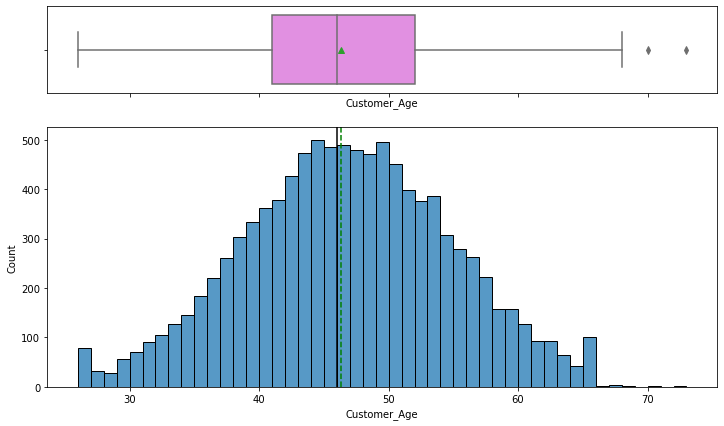

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(data, "Customer_Age")

- Very normal distribution, with the mean and median age around 46, two outliers over the age of 70

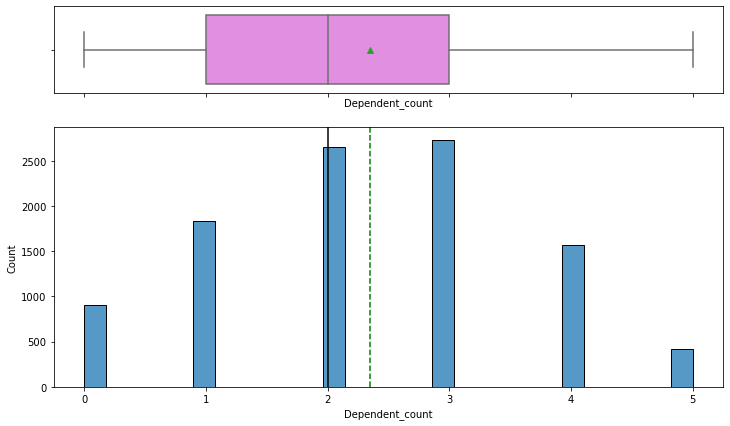

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "Dependent_count")

- Most customers have between 2 and 3 dependents. No outliers. Normal distribution.

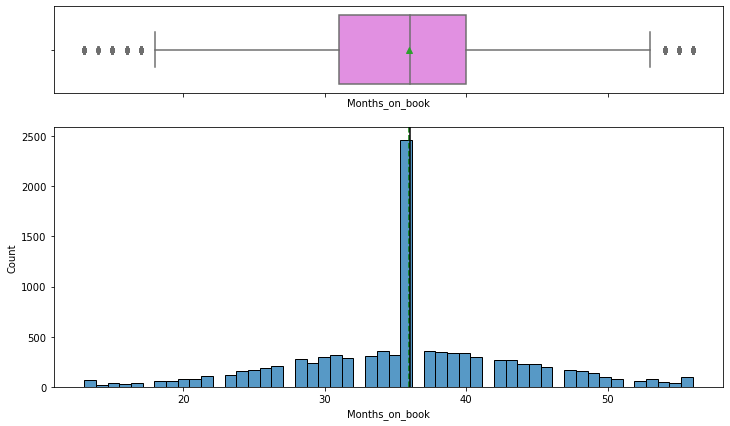

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "Months_on_book")

- It is very clear that most customers have been on the book for 3 years. There are outliers on both sides. Why are there so many customers with the same amount of months on the books? Was there a promotion 36 months ago which lead to a huge increase in customers?

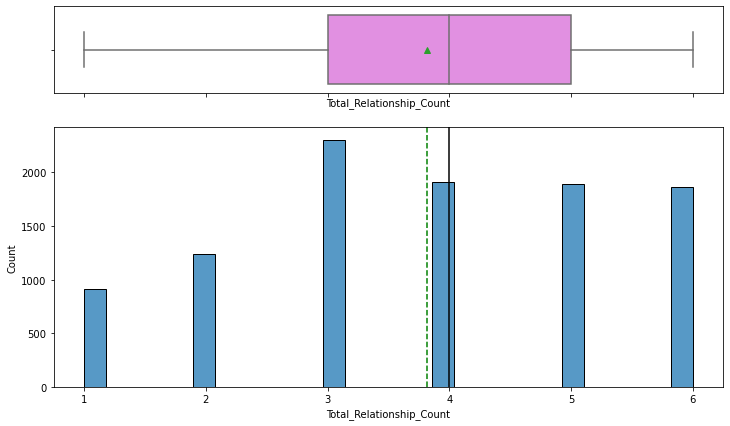

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Total_Relationship_Count")

- Mean and median of total relationship count is about 4. No outliers in this variable. No skewness.

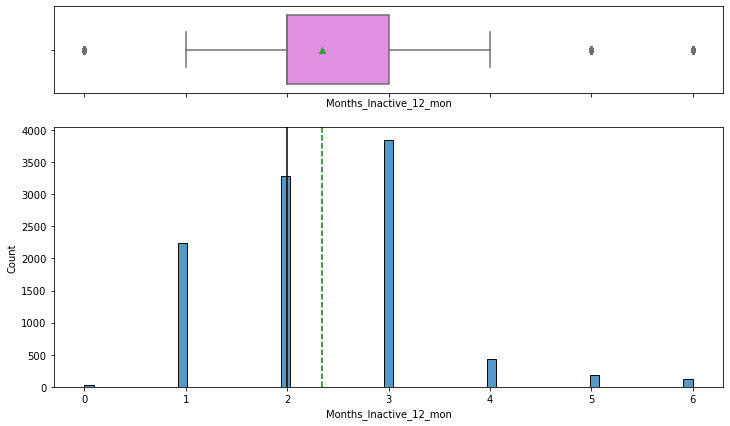

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Months_Inactive_12_mon")

- Median and mean months inactive is about 2. Outliers at 0, 5, and 6 months. Somewhat normal distribution.

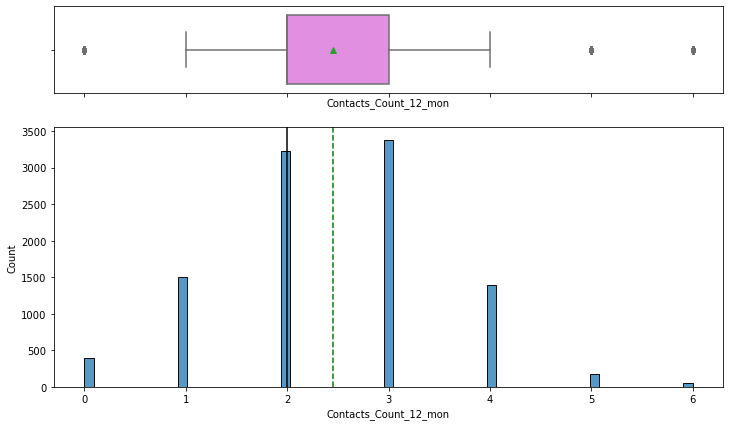

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "Contacts_Count_12_mon")

- Median and mean for contacts in the last 12 months is about 2. Outliers at 0, 5, and 6 contacts. Normal distribution.

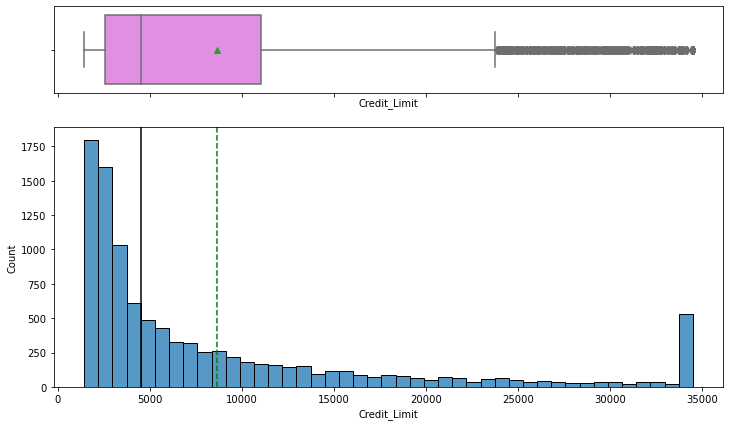

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "Credit_Limit")

- Very skewed right, and then a large bump in the number of customers with a high credit limit. Lots of outliers on the right side. Median is about 4k while the mean is somewhere around 8k for credit limit. 

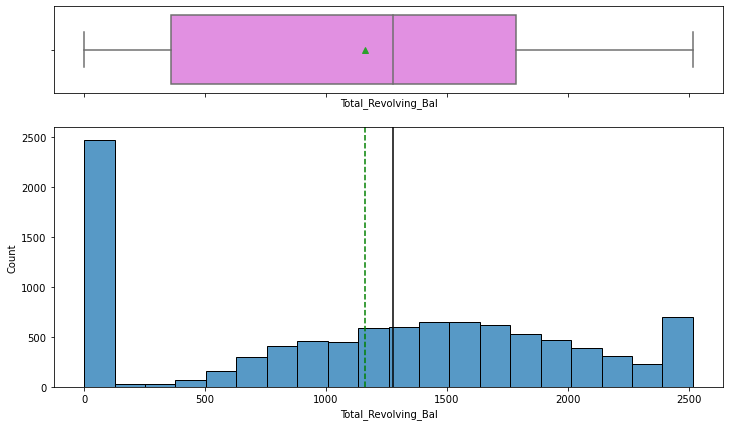

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "Total_Revolving_Bal")

- The most frequent value in this feature by alot is 0, meaning most customers do not keep a revolving balance - they pay off their credit cards. The second most is those with the highest revolving balance. This is a somewhat normal distribution as besides these customers mentioned before, the rest of the distribution is normal. 

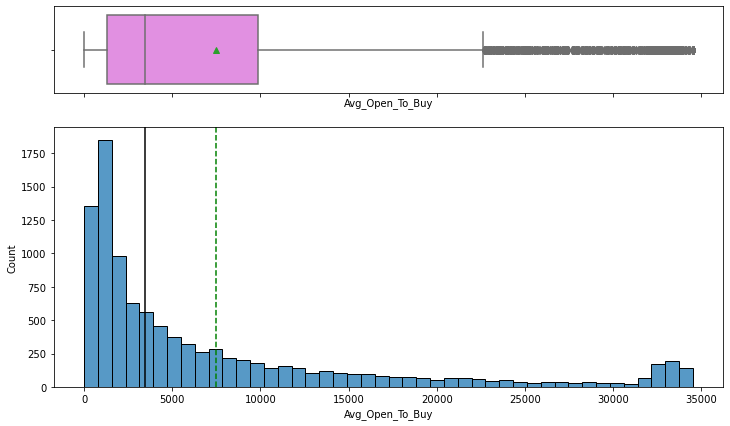

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "Avg_Open_To_Buy")

- Very skewed right. This is essentially showing us that most of the population in this data set either have low credit limits, or use their credit cards so often that they don't have much limit left to buy with. Lots of outliers on the right, as these people with huge amounts of available credit don't represent the average person in this dataset. 

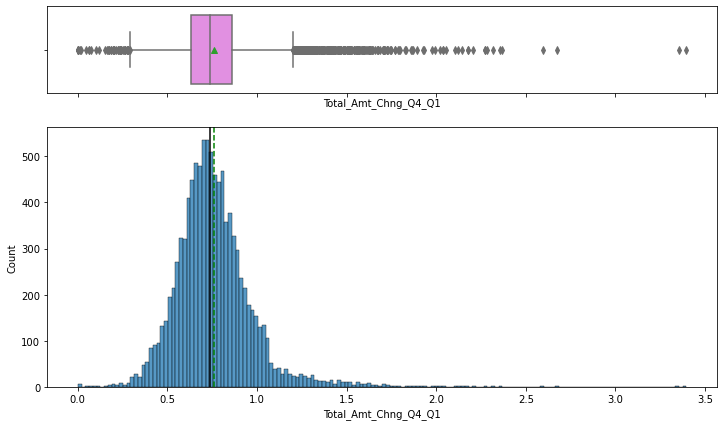

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

- Pretty normal distribution with lots of outliers on both the left and right. Median and mean close to 0.75.

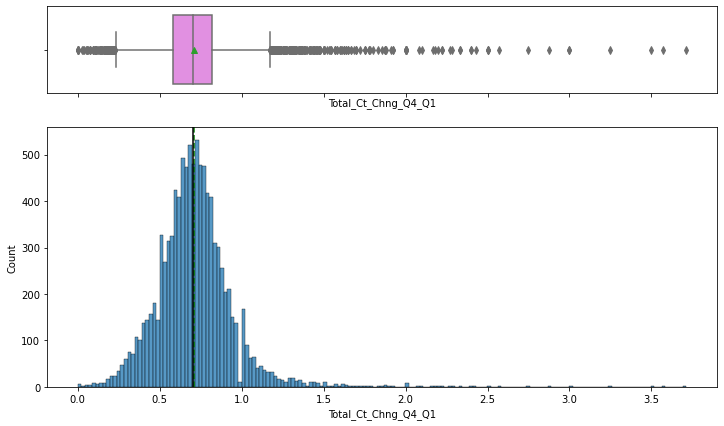

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

- Very similar to the amount ratio, mean and median both at 0.75, normal distribution, and lots of ourliers on both sides. 

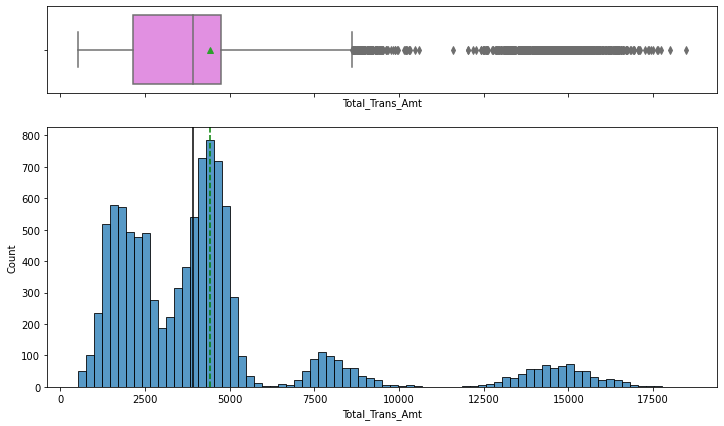

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "Total_Trans_Amt")

- Very strange distribution, lots of customers left of 7500 in total transaction amount. If customers have a low credit limit, they can only spend so much. There are lots of outliers to the right.

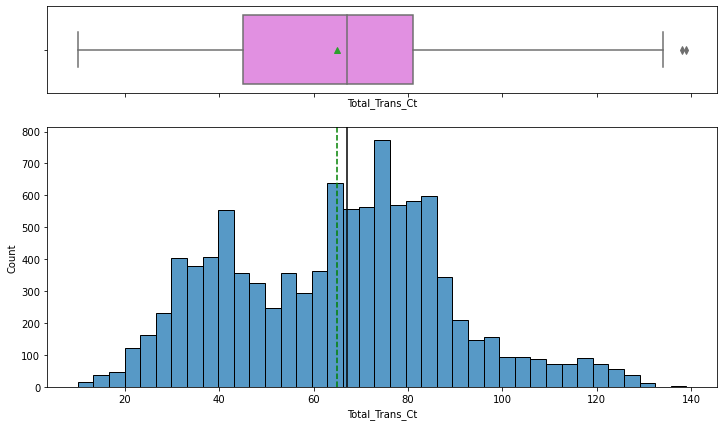

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "Total_Trans_Ct")

- Unlike transaction amount, transaction count is much more normal, only with a couple outliers at the very edge on the right. Median and mean somewhere around 65 transactions over a year period. 

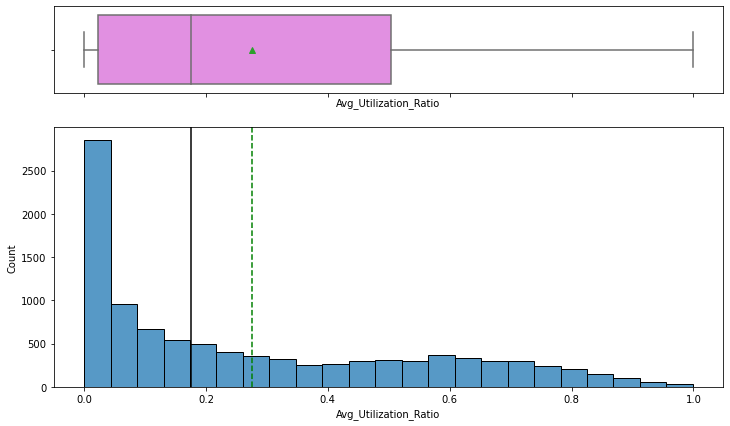

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

- Right skewed, but no outliers, many customers used 0% of their available credit. Median is about 18% of the available credit used and mean is about 28% of available credit used. Any bank is going to want to shift all these customers to the right on this graph - using more credit means the possibility of charging more fees related to it.

### Univariate Analysis - Categorical Variables

In [29]:
# For Categorical Variables and smaller numerical variables, I will use Barplots

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

<IPython.core.display.Javascript object>

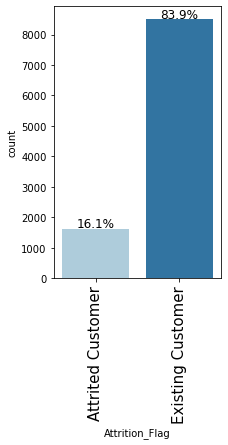

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "Attrition_Flag", perc=True)

 - Our target variable - we want to limit Attrited Customers. Currently, they represent 16.1% of this dataset.

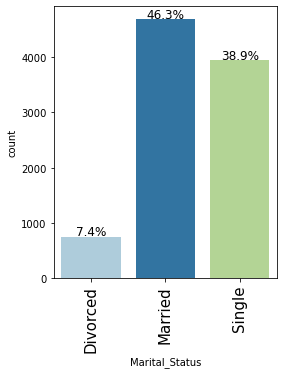

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "Marital_Status", perc=True)

- Married induviduals are the mode in this category, representing 46.3%, with single folks representing 38.9% after that. Divorced represent a small minority of the dataset.

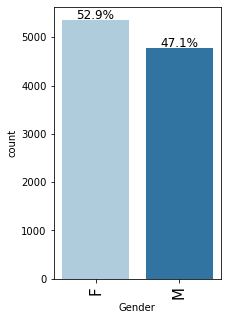

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "Gender", perc=True)

- Dataset is 53% Female and 47% Male

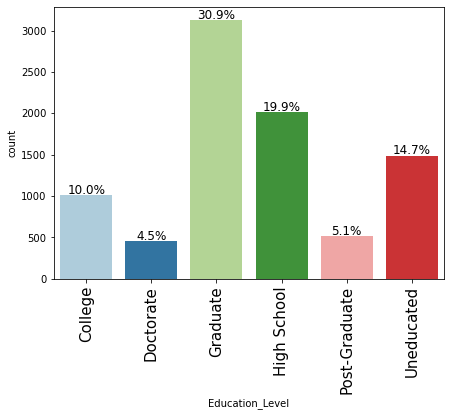

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "Education_Level", perc=True)

- A nice mix of education level with Graduates have the most at 31% of the dataset, followed by high school education at 20%.

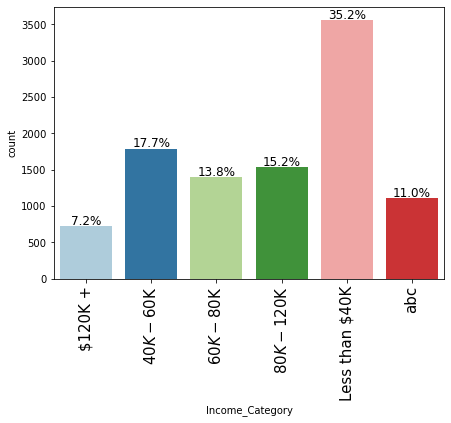

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "Income_Category", perc=True)

- Besides those who make less than 40k (35%), this is a somewhat uniform distribution. Even our mystery "abc" value represents 11%. 

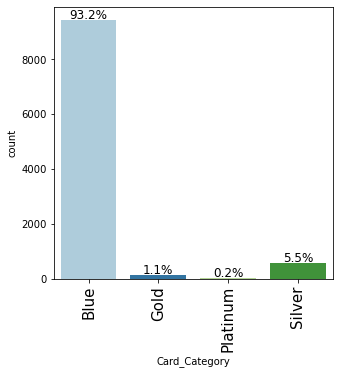

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "Card_Category", perc=True)

- Off of this graph alone, we can infer that Blue has the lowest credit limit (most of the people in the data set have them), silver is next, gold after that, and finally platinum representing just 0.2% of the dataset.

### Bivariate Analysis

In [36]:
# Encoding "Attrited Customer" and "Existing Customer" to 1 and 0 respectively, for analysis.

data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)

<IPython.core.display.Javascript object>

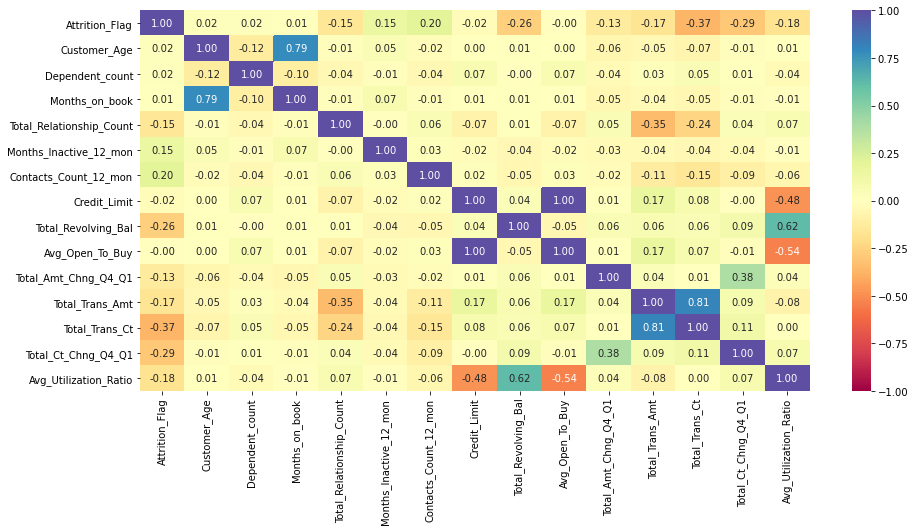

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Most of this makes sense just from doing univariate analysis, I will explore the target variable "Attrition_Flag" further below.
- Total transaction count and total transaction amount are highly correlated.
- Months_on_book and Customer_Age are highly correlated. 
- There is a negative relationship with Total_Relationship_Count and Total_Trans_Amt, as well as with Total_Trans_Ct.
- There is a negative relationship between Avg_Utilization_Ratio and Avg_Open_To_Buy.
- No numerical variables have a high correlation with our target variable.

In [38]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


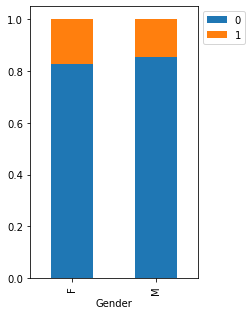

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "Gender", "Attrition_Flag")

- More Females than Males have attrited, which makes sense, they represent more of the dataset.

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


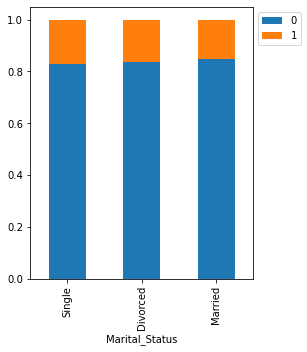

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

- The ratio of attrition between all 3 marital classes is very similar. 

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


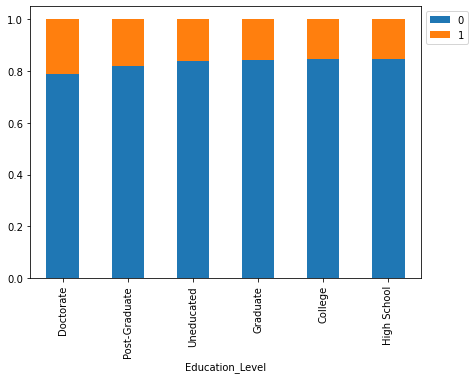

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

- Doctorate and Post Graduates have the highest levels of atrition. They represent the two smallest classes of this feature but also most likely bring in the most money. The bank wants them as credit customers. They will have higher incomes and therefore higher credit limits. 

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


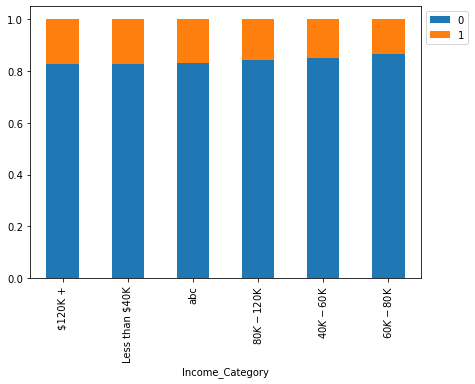

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

- 120k+ incomes have the highest levels of attrition. This is the opposite of what the bank wants.

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


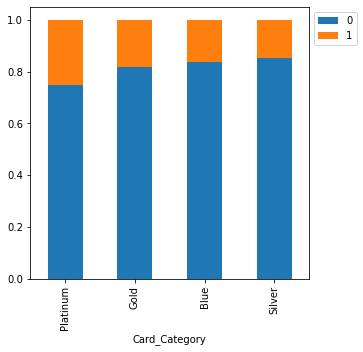

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

- Platinum Card holders are leaving more than the other three, this probably relates to education and income as well. 

In [44]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

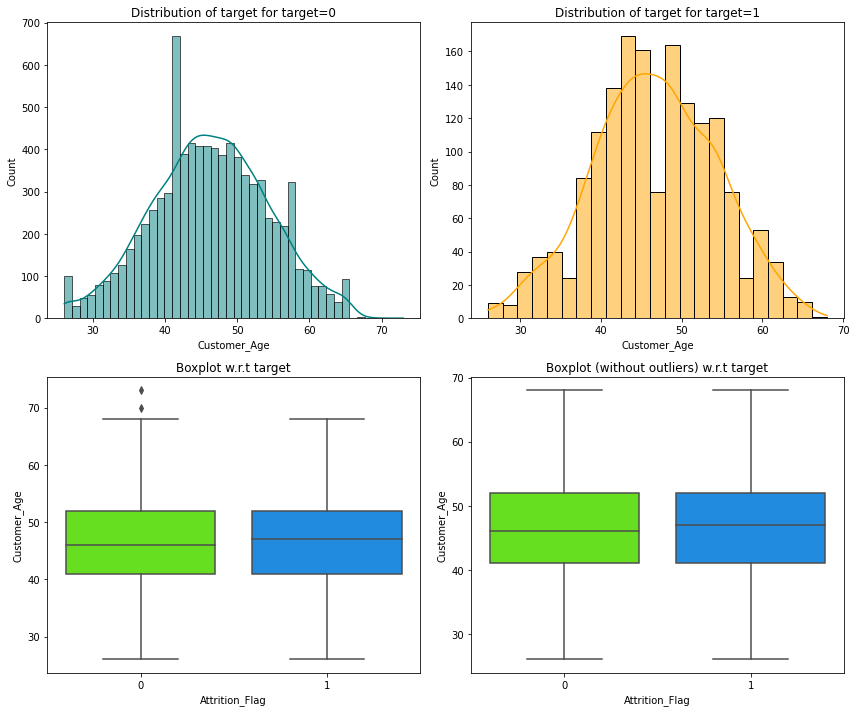

<IPython.core.display.Javascript object>

In [45]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

- Customer Age does not seem to have a large impact on the target variable. The median age for attrited customers seems to be a tiny bit higher than the age of existing customers.

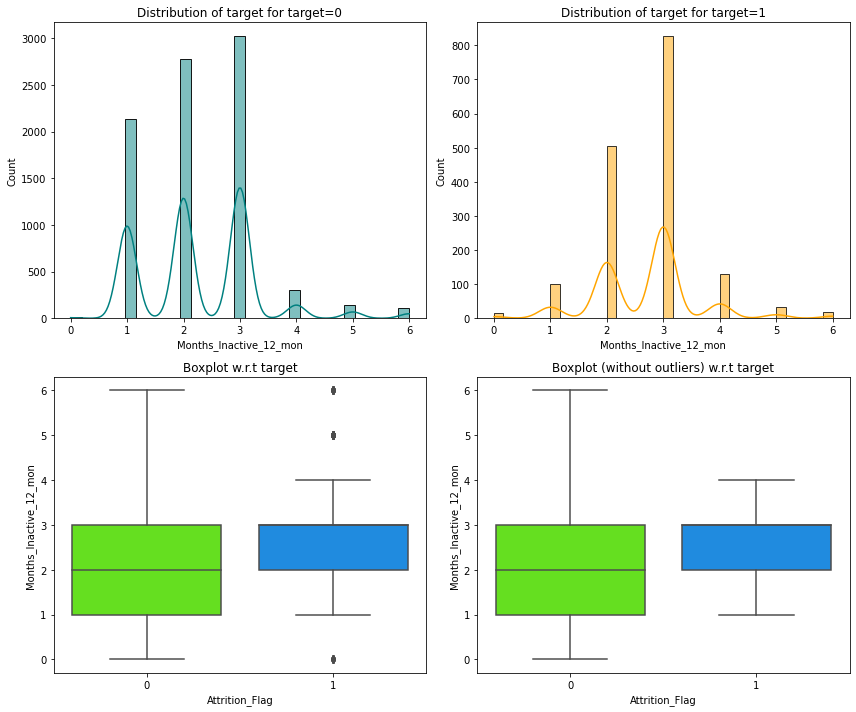

<IPython.core.display.Javascript object>

In [46]:
distribution_plot_wrt_target(data, "Months_Inactive_12_mon", "Attrition_Flag")

- It is clear that most attrited customers stayed between 1-4 months inactive. This could signal that they are quick to decide they want to leave and don't stick around long once they make that decision. 

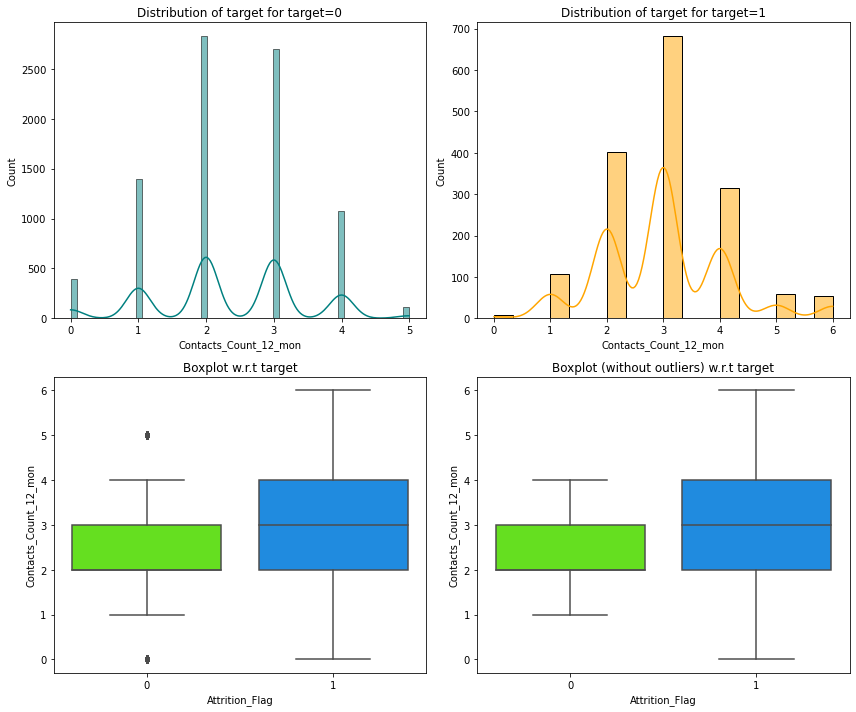

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(data, "Contacts_Count_12_mon", "Attrition_Flag")

- This is showing us that customers who attrited contact the bank at a higher rate than those who are still existing customers. 

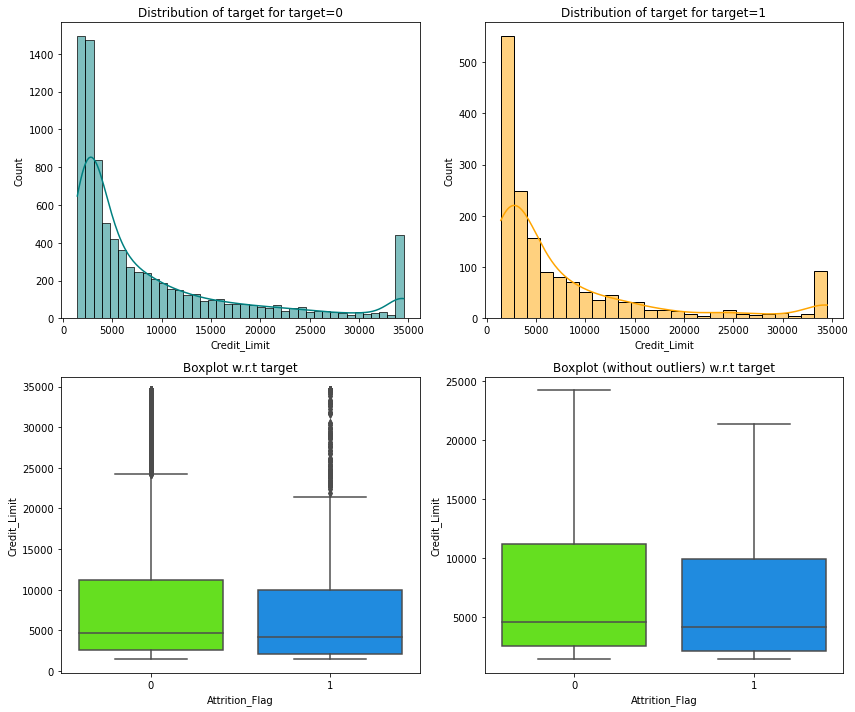

<IPython.core.display.Javascript object>

In [48]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

- It seems for the most part, if we ignore outliers, the bulk of attrited customers had lower credit limits than existing customers. 

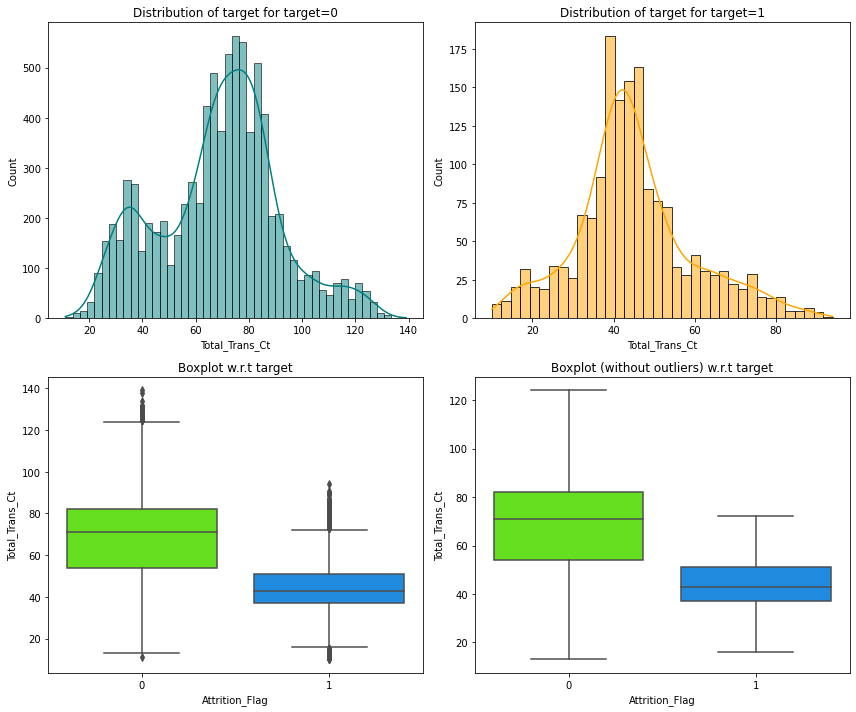

<IPython.core.display.Javascript object>

In [49]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

- This shows that Transaction count most likely has a big role in whether someone is attriting or not. Those who attrit seem to have much lower transaction counts. 

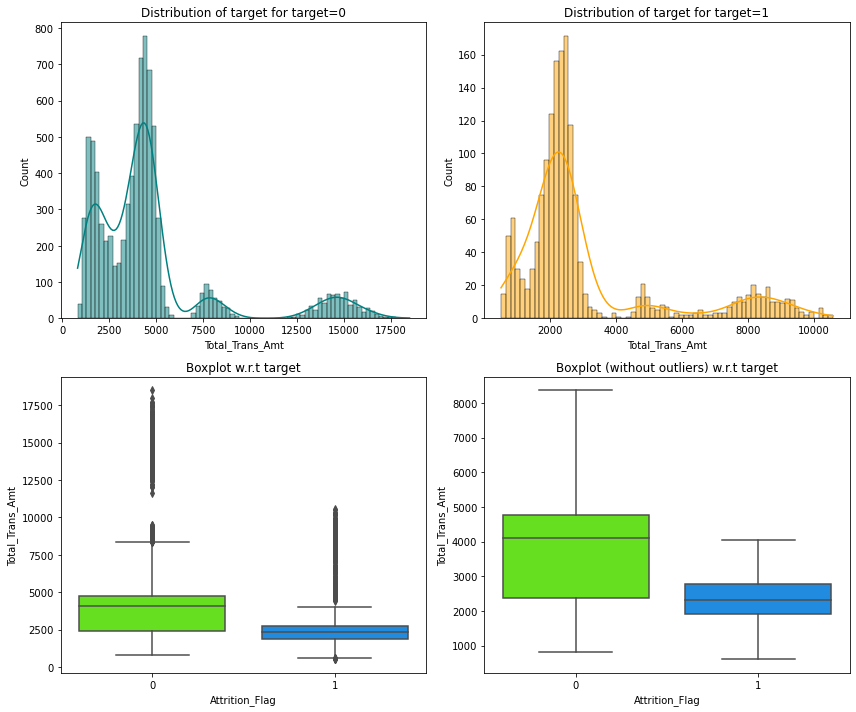

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

- It is clear that customers who attrited spent less money with their credit cards. 

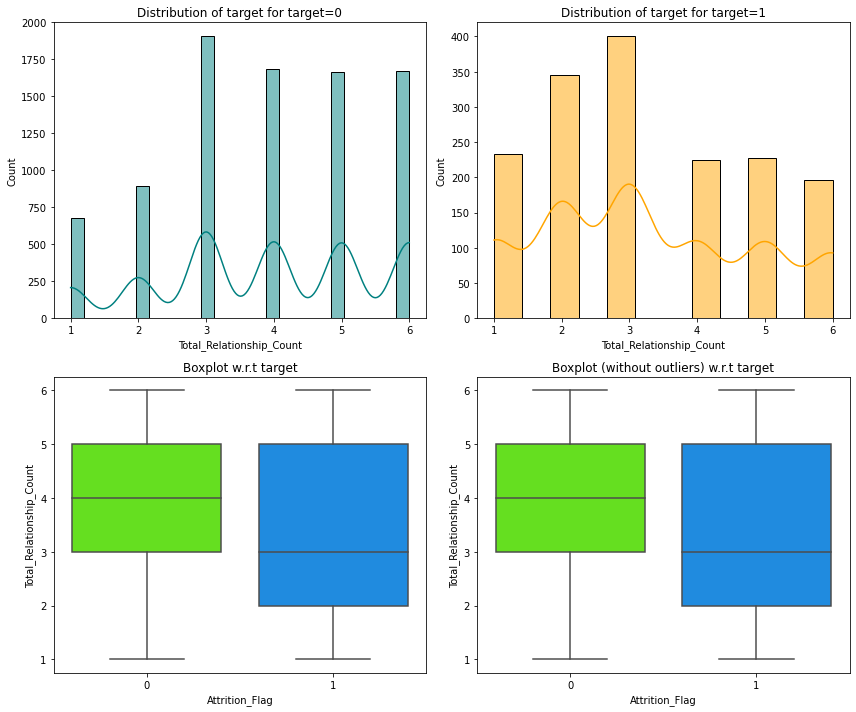

<IPython.core.display.Javascript object>

In [51]:
distribution_plot_wrt_target(data, "Total_Relationship_Count", "Attrition_Flag")

- It seems in both existing and attrited customers, the mode of relationships with the bank is 3. The median amount of relationships is lower for attrited customers, it seems they tend to have less relationships. This makes sense, as most people who have multiple accounts at a bank don't tend to leave unless something very bad happens. 

### Feature Engineering

In [52]:
data.replace({"abc": np.nan}, inplace=True)

<IPython.core.display.Javascript object>

In [53]:
data["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

- There does not seem to be any columns I need to directly deal with entirely. The income category will need to have its 'abc' values replaced, which I will do as if they were missing.

In [54]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

- The three categories with missing values are Education_Level, Marital_Status, and Income_Category. I will simple impute these using the most frequent (mode) of each category. But I need to split my data sets up to avoid data leakage first. 

### Outlier Treatment

- I have decided against tampering with the data in terms of outlier treatment. I believe that the variables with outliers including "Total Transaction Amount" and "Credit Limit" show realistic distributions, and that capping or flooring these values will severely impact my models. Additionally, I believe removing all these data points from the population will make me lose out on valuable information. For these main reasons, I will treat missing values only and leave outliers where they are.

### Data Preparation for Modeling and Missing Value Treatment

In [55]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [56]:
X = data1.drop(columns="Attrition_Flag")
X = pd.get_dummies(X)
y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [57]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 34) (2026, 34) (2026, 34)


<IPython.core.display.Javascript object>

In [58]:
imputer = SimpleImputer(strategy="most_frequent")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

- I replaced all missing values in the colums Education, Marital Status, and Income with the mode 

### Metric Of Interest

- Thera Bank wants to limit the number of people who leave their card services. When customers leave, this is a huge financial loss to the bank through fees and other charges. 

- We want to limit false negatives in this situation, aka those customers who we predict won't leave card services but actually do. 

- To limit false negatives, we will focus on Recall for our models. 
- I will first build 18 models (6 normal, 6 oversampled, and 6 undersampled) rather quickly, and then do a deep dive on the three which I think will perform best. Most likely, I would like to take one from each group of 6 to ensure diversity when hypertuning my models. This is where I will also do a deep dive on the validation set as well, as I will not be focusing on the validation set in the beginning. 
- I will be using the Kfold technique and cross-validation to choose which three models I would like to explore further.

### First 6 Models

In [59]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LR", LogisticRegression(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

LR: 41.583464154892724
Random forest: 74.58817373103088
GBM: 81.04081632653062
Adaboost: 81.3469387755102
Xgboost: 86.57666143380428
dtree: 79.2014652014652

Training Performance:

LR: 41.49590163934426
Random forest: 100.0
GBM: 87.5
Adaboost: 83.81147540983606
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

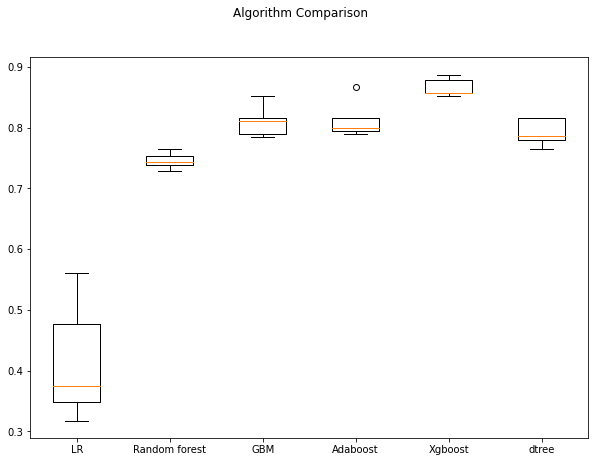

<IPython.core.display.Javascript object>

In [60]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- XGBoost, Adaboost, and GBM were the three strongest performers in recall according to cross validation. I will chose XGBoost to represent the normal models, as it had an average recall score of around 0.87.

### Oversampling Using SMOTE

In [61]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 34)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

In [62]:
models2 = []  # Empty list to store all the models

# Appending models into the list
models2.append(("LR", LogisticRegression(random_state=1)))
models2.append(("Random forest", RandomForestClassifier(random_state=1)))
models2.append(("GBM", GradientBoostingClassifier(random_state=1)))
models2.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models2.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models2.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models2:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models2:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

LR: 83.29075025495969
Random forest: 96.84259847216609
GBM: 97.31324443418193
Adaboost: 96.5091881698705
Xgboost: 98.1565356270084
dtree: 94.52846889491812

Training Performance:

LR: 84.80094136105119
Random forest: 100.0
GBM: 98.05844283192783
Adaboost: 97.05824671504216
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

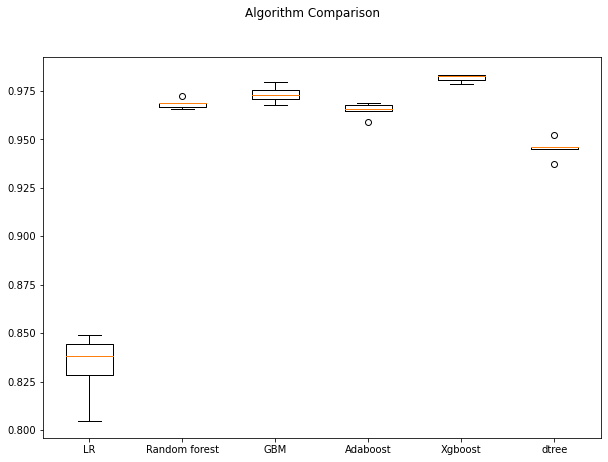

<IPython.core.display.Javascript object>

In [63]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- During Oversampling using SMOTE, XGBoost, Random Forest, and GBM were my three best performing models. All models did well however in the recall metric during oversampling. Decision Tree was middle of the pack in recall score, but I will be using this in my randomized search because I am curious to see how much I can get the model to improve with hyper tuning. 

### Undersampled Using Random Undersampler

In [64]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [65]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 34)
After Undersampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [66]:
models3 = []  # Empty list to store all the models

# Appending models into the list
models3.append(("LR", LogisticRegression(random_state=1)))
models3.append(("Random forest", RandomForestClassifier(random_state=1)))
models3.append(("GBM", GradientBoostingClassifier(random_state=1)))
models3.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models3.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models3.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models3:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models3:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

LR: 81.4531658817373
Random forest: 92.21350078492935
GBM: 93.95499738356882
Adaboost: 93.24018838304553
Xgboost: 95.08267922553637
dtree: 87.91051805337518

Training Performance:

LR: 82.88934426229508
Random forest: 100.0
GBM: 98.15573770491804
Adaboost: 95.28688524590164
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

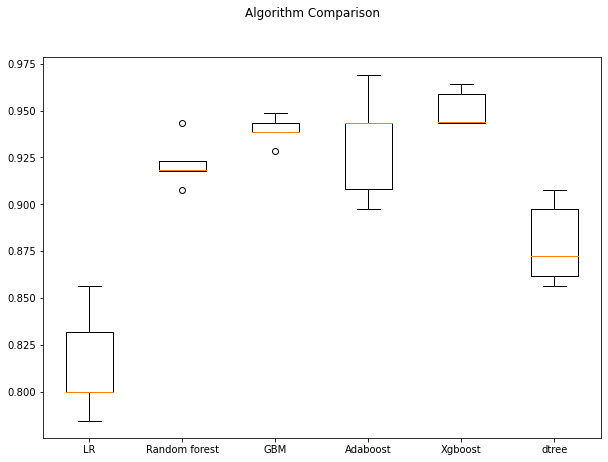

<IPython.core.display.Javascript object>

In [67]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- All models performed reletively well to one another, but for the undersampled class, I am going to further investigate the Adaboost model which had an average recall score of 0.93.

### Hyperparameter Tuning

- As stated before, I will take XGBoost from the normal data, Decision Tree from the oversampled data, and Adaboost from the undersampled data
- I am doing this in part because of their high average recall scores, aquired from Kfold modeling and cross-validation
- I am also doing this for diversity, I wanted to explore three different types of models to see how well they perform under random search tuning. 
- I expect Logistic Regression to perform the worst, but I want to see how it stacks up to the other high performing models with hypertuning. 

In [68]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [69]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### XGBoost Tuning Using Randomized Search

In [70]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9682260596546313:
Wall time: 48.6 s


<IPython.core.display.Javascript object>

In [71]:
# building model with best parameters
xgb_tuned = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=0,
    subsample=0.8,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=2,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [72]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.85,0.98,0.52,0.68


<IPython.core.display.Javascript object>

In [73]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.85,0.97,0.51,0.67


<IPython.core.display.Javascript object>

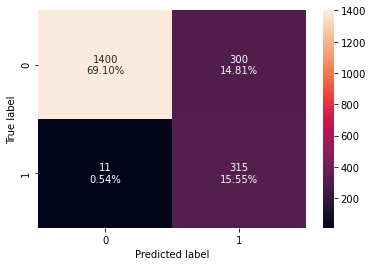

<IPython.core.display.Javascript object>

In [74]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

- The model is very consistent between the train and validation sets. Very high recall and similar accuracy has been achieved which means the model is not overfitting or underfitting. 
- This model is performing very well. 
- Next I will look at the oversampled data.

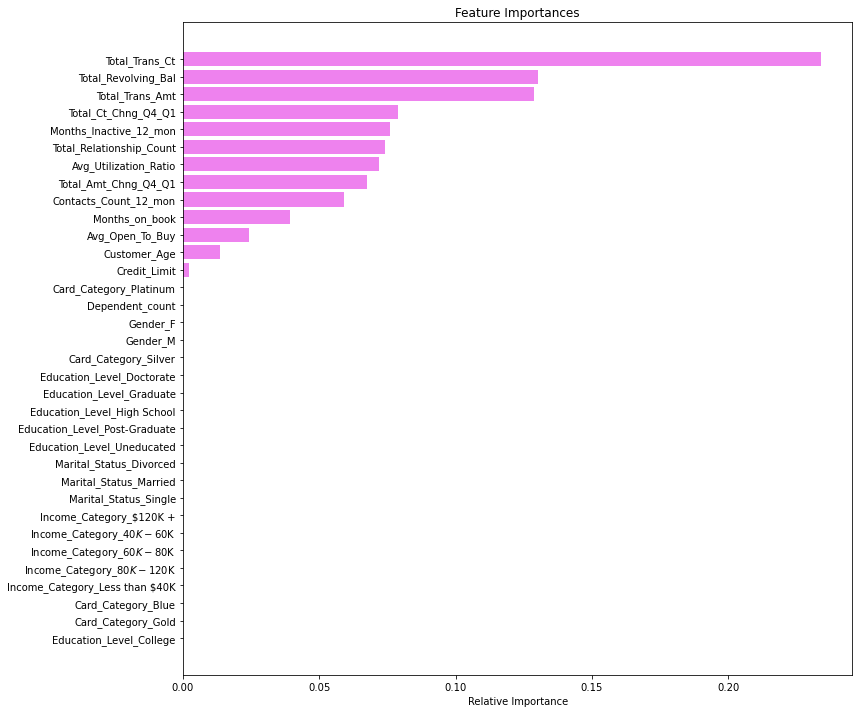

<IPython.core.display.Javascript object>

In [75]:
feature_names = X.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree Tuning with Oversampled Data Using Randomized Search

In [76]:
# building model
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'} with CV score=0.9296038022667359:


<IPython.core.display.Javascript object>

In [77]:
# Creating new model with best parameters
dtree_tuned = DecisionTreeClassifier(
    random_state=1, criterion="entropy", max_depth=None, min_samples_split=2
)

# Fit the model on training data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

<IPython.core.display.Javascript object>

In [78]:
# Calculating different metrics on train set
dtree_random_train = model_performance_classification_sklearn(
    dtree_tuned, X_train_over, y_train_over
)
print("Training performance:")
dtree_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.96,0.92,1.00,0.96


<IPython.core.display.Javascript object>

In [79]:
# Calculating different metrics on validation set
dtree_random_val = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
print("Validation performance:")
dtree_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.94,0.82,0.80,0.81


<IPython.core.display.Javascript object>

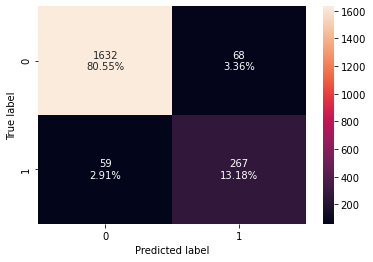

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

- This model is not terrible, however it is overfitting on the training set, and not nearly as strong as our XGBoost model on the original data. None of the numbers jump out as bad to me, although I would like to see recall a bit higher on the validation set.

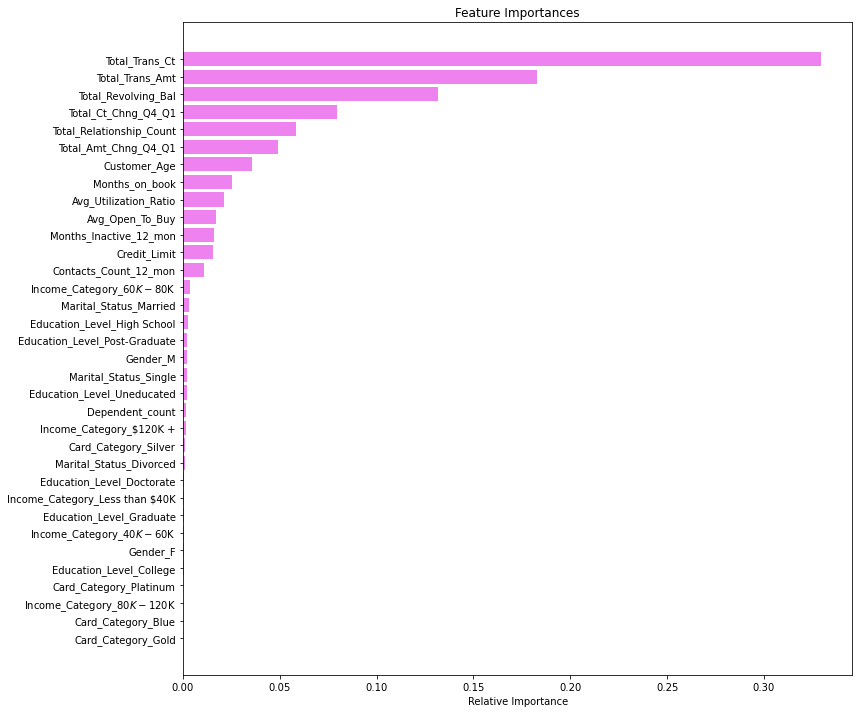

<IPython.core.display.Javascript object>

In [81]:
feature_names = X.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### AdaBoost Tuning With Undersampled Data Using Randomized Search

In [82]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.947760334903192:
Wall time: 22.3 s


<IPython.core.display.Javascript object>

In [83]:
# building model with best parameters
adb_tuned = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.2,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [84]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.99,0.97,0.98,0.98


<IPython.core.display.Javascript object>

In [85]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.97,0.88,0.93,0.90


<IPython.core.display.Javascript object>

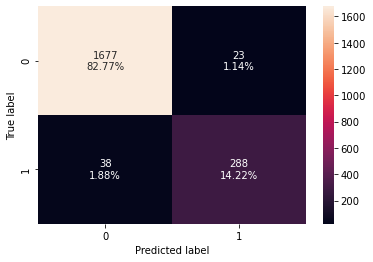

<IPython.core.display.Javascript object>

In [86]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned, X_val, y_val)

- Again, very good performance but a little overfitting by the training set. It is still a very solid model with an F1 score of 0.90 on the validation set.

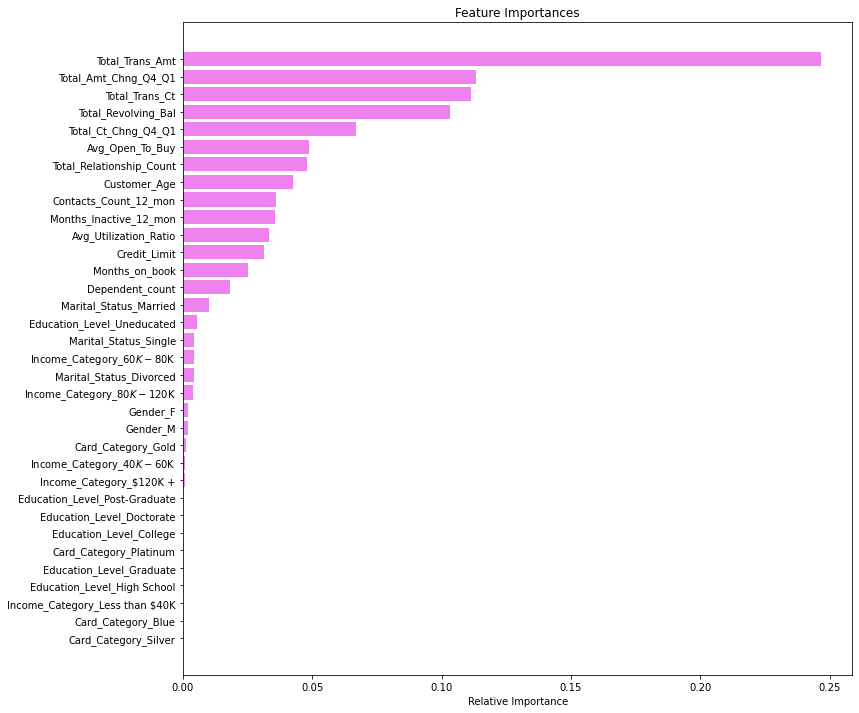

<IPython.core.display.Javascript object>

In [87]:
feature_names = X.columns
importances = adb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing All Models

In [88]:
# training performance comparison

models_train_comp_df = pd.concat(
    [xgboost_random_train.T, dtree_random_train.T, Adaboost_random_train.T,], axis=1,
)
models_train_comp_df.columns = [
    "XGBoost Tuned with Random Search",
    "Decision Tree with Oversampled Data Tuned with Random Search",
    "Adaboost with Undersampled Data Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost Tuned with Random Search,Decision Tree with Oversampled Data Tuned with Random Search,Adaboost with Undersampled Data Tuned with Random Search
Accuracy,0.85,0.96,0.99
Recall,0.98,0.92,0.97
Precision,0.52,1.00,0.98
F1,0.68,0.96,0.98


<IPython.core.display.Javascript object>

In [89]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [xgboost_random_val.T, dtree_random_val.T, Adaboost_random_val.T,], axis=1,
)
models_val_comp_df.columns = [
    "XGBoost Tuned with Random Search",
    "Decision Tree with Oversampled Data Tuned with Random Search",
    "Adaboost with Undersampled Data Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost Tuned with Random Search,Decision Tree with Oversampled Data Tuned with Random Search,Adaboost with Undersampled Data Tuned with Random Search
Accuracy,0.85,0.94,0.97
Recall,0.97,0.82,0.88
Precision,0.51,0.80,0.93
F1,0.67,0.81,0.90


<IPython.core.display.Javascript object>

- All three models did well
- XGBoost model was far and away the best performer in recall, but it has a much lower precision score than the other two models.
- Decision Tree with oversampled data is a good model, but the Adaboost model with undersampled data is better in all four metrics.
- Since the XGBoost model is so close to the training set, signifying to me no overfitting or underfitting, that is what I will test my test data on. 

### Pipeline

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing
- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [90]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Total_Amt_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Gender", "Marital_Status", "Education_Level", "Income_Category", "Card_Category"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [91]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
Y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [92]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

In [93]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=0.8,
                learning_rate=0.1,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=2,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                            

<IPython.core.display.Javascript object>

In [94]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

In [95]:
# Calculating different metrics on train set
Pipeline_Model = model_performance_classification_sklearn(model, X_test, y_test)
print("Testing performance:")
Pipeline_Model

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.85,0.98,0.52,0.68


<IPython.core.display.Javascript object>

- Model has performed well compared to the validation and training set, with a recall score of 0.98. The model predicts false negatives very well, which is our goal.

### Business Recommendations

- My model is good at predicting recall, meaning that it aims to lower false negatives. In this case, a false negative would be a customer that the model predicts as not becoming an attriting customer, but in reality they are. If we can lower these false negatives as low as possible, it will equal more correctly identified customers. 

- The bank loses out on multiple charges and fees when people leave their credit card services

- The model we have chosen shows 'Total Transaction Count' as the most important variable. From our research into this variable, we can see that customer with lower transaction counts have a much higher chance of being an attrited customer. Since 'Total Transaction Amount' has a rather high corellation with 'Total Transaction Count', we see that customers with lower transaction amounts also have a much higher chance of attrition. 

- 93% of the customer base in the data set uses Blue Credit Cards (the lowest one), these customers also overall have the lowest percentage of attrition. Customers with Platinum Credit Cards (the highest one) have the highest percentage of attrition. Targeting the high end users and checking in on them could be an easy way to keep some customers, and it would be cheap because there aren't very many of them. 

- Customers with doctorates and those with high incomes also have high percentages of attriting compared to the other options in their respective variables. These customers are also going to be alot of the same ones with higher end credit cards, with higher credit limits. They could be reached out to as well on a more constant basis by the bank to ensure satisfaction with the banks' services.

- I have experience working in a bank, and in most cases, lower end accounts or lower end credit cards make the financial institution more fees, because they have less perks associated with them. The lower card customers themselves may not spend nearly as much money due to lower credit limits, but they make up most of the entire population of bank customers meaning they should probably be the focus of any bank goals to limit attrition. 

- One strategy the bank could impliment would be a simple survey for all customers. This may not bring in great results all-around, but it could give a baseline. People would leave a banks credit card services either because they are unhappy with the product they're getting, or they have found a better product somewhere else. Offering a promotion for existing (and new) customers could be a great way to incentivize customers to stick around. Whether it is cash back or points, or even gives rewards for having multiple other relationships at the bank, that is what tends to keep customers around. Customers do not like leaving banks when they have multiple relationships tied to them. 

- Overall, the model will ensure that very few false negatives are found. The bank can use this model to find the customers that are predicted to be attriting, and go to them induvidually. 